### **1. Image Pre-Processing Overview**

Image pre-processing involves low-level operations that prepare an image for further analysis or processing. Common operations include:

- **Gray level transformations**: Adjusting pixel intensity values.
- **Noise filtering**: Removing unwanted noise from the image.
- **Image enhancement**: Improving the visual quality of the image.

These operations are often implemented using **discrete convolution**, which is a mathematical operation that combines two signals (in this case, the image and a filter/kernel).


### **2. Discrete Convolution**

- **What is it?**
    
    Convolution is a process where a small matrix (called a kernel or filter) slides over the image, and at each position, it computes a weighted sum of the pixel values in the neighborhood of the kernel. This weighted sum becomes the new pixel value in the output image.
    
- **Intuition**:
    
    Think of convolution as a way to "blend" or "mix" the pixel values in a local area. The kernel determines how much each neighboring pixel contributes to the new pixel value.
    
- **Visualization**:
    
    You can visualize convolution by showing how the kernel moves over the image and computes the new pixel values. For example, you can animate the kernel sliding over the image and updating the output.
    


In [1]:
pip install numpy spicy matplotlib

Note: you may need to restart the kernel to use updated packages.


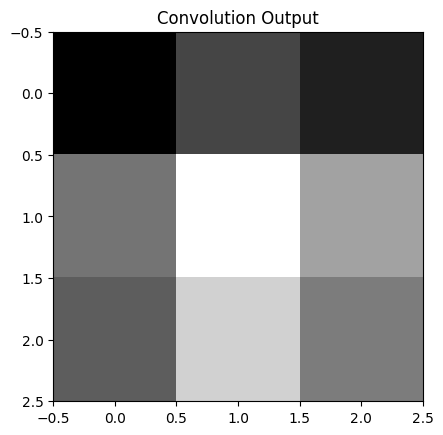

In [4]:
import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

# Example image
image = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Example kernel (mean filter)
kernel = np.ones((3, 3)) / 9

# Apply convolution
output = convolve2d(image, kernel, mode='same')

# Visualize
plt.imshow(output, cmap='gray')
plt.title("Convolution Output")
plt.show()


### **3. Noise and Filters**

- **Types of Noise**:
    - **Salt & Pepper Noise**: Random black and white pixels.
    - **Gaussian Noise**: Random noise with a Gaussian distribution.
    - **Impulse Noise**: Random spikes in intensity.
- **Filters**:
    - **Mean Filter**: Replaces each pixel with the average of its neighbors. Good for Gaussian noise but blurs edges.
    - **Median Filter**: Replaces each pixel with the median of its neighbors. Great for salt & pepper noise and preserves edges.
    - **Gaussian Filter**: Smooths the image using a Gaussian kernel. Good for Gaussian noise.
- **Intuition**:
    - **Mean Filter**: Think of it as "blurring" the image by averaging nearby pixels.
    - **Median Filter**: Think of it as "cleaning up" the image by removing extreme values (like salt & pepper noise).
    - **Gaussian Filter**: Think of it as a "soft blur" that preserves more details than a mean filter.

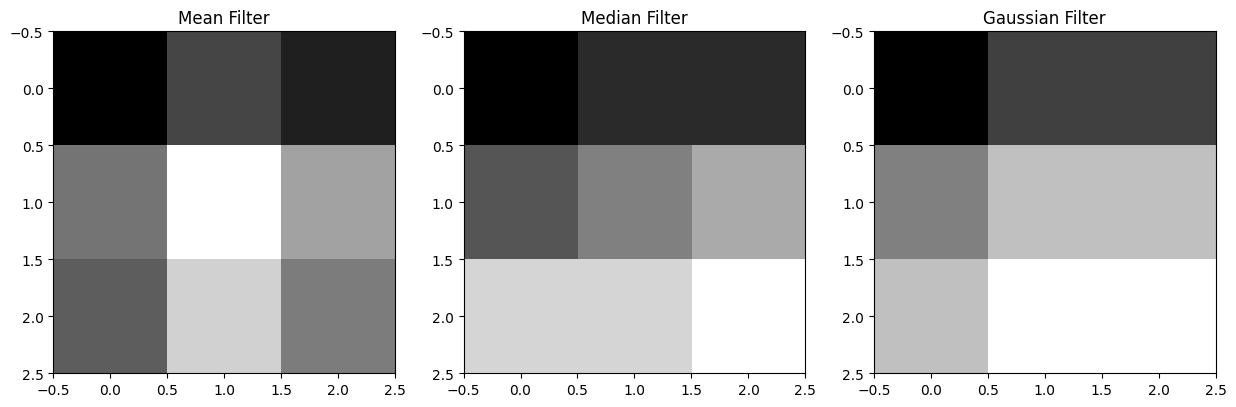

In [5]:
from scipy.ndimage import median_filter, gaussian_filter

# Apply mean filter
mean_filtered = convolve2d(image, kernel, mode='same')

# Apply median filter
median_filtered = median_filter(image, size=3)

# Apply Gaussian filter
gaussian_filtered = gaussian_filter(image, sigma=1)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(mean_filtered, cmap='gray')
axes[0].set_title("Mean Filter")
axes[1].imshow(median_filtered, cmap='gray')
axes[1].set_title("Median Filter")
axes[2].imshow(gaussian_filtered, cmap='gray')
axes[2].set_title("Gaussian Filter")
plt.show()

### **Image Enhancement**

- **Histogram Equalization**:
    - **What is it?**
        
        It redistributes the intensity values of an image so that the histogram of the output image is more uniform. This improves contrast.
        
    - **Intuition**:
        
        Think of it as "stretching" the intensity values to cover the full range, making dark areas darker and bright areas brighter.

In [6]:
pip install scikit-image

Note: you may need to restart the kernel to use updated packages.


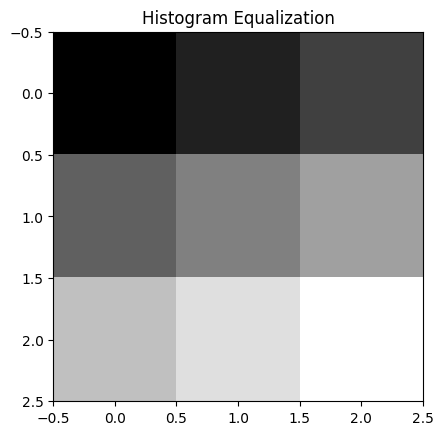

In [7]:
from skimage import exposure

# Apply histogram equalization
equalized = exposure.equalize_hist(image)

# Visualize
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Equalization")
plt.show()


- **Gamma Correction**:
    - **What is it?**
        
        It adjusts the brightness of an image by applying a non-linear transformation to the pixel values.
        
    - **Intuition**:
        
        Think of it as "boosting" the brightness of dark areas without overexposing bright areas.

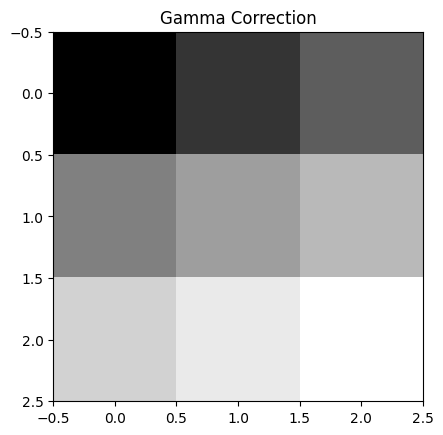

In [8]:
# Apply gamma correction
gamma_corrected = exposure.adjust_gamma(image, gamma=0.5)

# Visualize
plt.imshow(gamma_corrected, cmap='gray')
plt.title("Gamma Correction")
plt.show()


### **Putting It All Together in a Jupyter Notebook**

To make the concepts visually intuitive, you can create a Jupyter Notebook with the following structure:

1. **Load an Image**: Start by loading a sample image (e.g., using `matplotlib` or `opencv`).
2. **Add Noise**: Add different types of noise (salt & pepper, Gaussian, etc.) to the image.
3. **Apply Filters**: Show the effect of mean, median, and Gaussian filters on the noisy image.
4. **Enhance the Image**: Apply histogram equalization and gamma correction to improve the image.
5. **Visualize Results**: Use `matplotlib` to display the original, noisy, filtered, and enhanced images side by side.

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from scipy.ndimage import median_filter, gaussian_filter
from skimage import exposure

# Load an image
image = plt.imread('sample_image.jpg')

# Add noise
noisy_image = add_noise(image, noise_type='salt_pepper')

# Apply filters
mean_filtered = convolve2d(noisy_image, kernel, mode='same')
median_filtered = median_filter(noisy_image, size=3)
gaussian_filtered = gaussian_filter(noisy_image, sigma=1)

# Enhance the image
equalized = exposure.equalize_hist(image)
gamma_corrected = exposure.adjust_gamma(image, gamma=0.5)

# Visualize results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 1].imshow(noisy_image, cmap='gray')
axes[0, 1].set_title("Noisy Image")
axes[0, 2].imshow(mean_filtered, cmap='gray')
axes[0, 2].set_title("Mean Filter")
axes[1, 0].imshow(median_filtered, cmap='gray')
axes[1, 0].set_title("Median Filter")
axes[1, 1].imshow(gaussian_filtered, cmap='gray')
axes[1, 1].set_title("Gaussian Filter")
axes[1, 2].imshow(equalized, cmap='gray')
axes[1, 2].set_title("Histogram Equalization")
plt.show()


### **Key Takeaways**

- **Convolution**: A sliding window operation that blends pixel values using a kernel.
- **Filters**: Mean, median, and Gaussian filters are used to remove noise and smooth images.
- **Enhancement**: Histogram equalization and gamma correction improve image contrast and brightness.

By visualizing each step in a Jupyter Notebook, you can make these concepts intuitive and easy to understand!